In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Importing Image


In [28]:
# mnist = cv2.imread('../datasets/digits.png', 0)
mnist = cv2.imread('../datasets/fashion.png', 0)
mnist.shape

(840, 840)

### Getting Shape

In [29]:
# 50 images column 100 images row

# images = np.array([np.hsplit(row, 100) for row in np.vsplit(mnist, 50)], dtype = np.float32)
images = np.array([np.hsplit(row, 30) for row in np.vsplit(mnist, 30)], dtype = np.float32)
images.shape

(30, 30, 28, 28)

### Train and Test  Features

In [35]:
# train_features = images[:,:50].reshape(-1, (20 * 20))

# test_features = images[:, 50:100].reshape(-1, (20 * 20))

train_features = images[:,:15].reshape(-1, (28 * 28))

test_features = images[:, 15:30].reshape(-1, (28 * 28))

### Create Labels

In [36]:
# k = np.arange(10)
# train_labels = np.repeat(k, 250).reshape(-1, 1)
# test_labels = train_labels.copy()

k = np.arange(10)
train_labels = np.repeat(k, 45).reshape(-1, 1)
test_labels = train_labels.copy()

### Create KNN 

In [37]:
knn = cv2.ml.KNearest_create()
knn.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

### Using the trained KNN

In [38]:
#use K = 3
ret, result, neighbors, dist = knn.findNearest(test_features, 3)

### Measure Model Accuracy

In [39]:
#check if results are correct
matches = np.equal(result, test_labels)
#convert bool to int
matches = matches.astype(np.int)
#
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result.size

#display knn accuracy
print(accuracy)

70.88888888888889


# SVM

In [40]:
svm = cv2.ml.SVM_create()

In [41]:
svm.setKernel(cv2.ml.SVM_LINEAR)
svm.setC(2.67)
svm.setGamma(5.383)
svm.setType(cv2.ml.SVM_C_SVC)

### Training the SVM 

In [42]:
svm.train(train_features, cv2.ml.ROW_SAMPLE, train_labels)

True

In [43]:
result = svm.predict(test_features)

### Getting the Accuracy for SVM

In [44]:
matches = np.equal(result[1], test_labels)
matches = matches.astype(np.int)
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result[1].size

In [45]:
print("Accuracy: {}".format(accuracy))

Accuracy: 74.66666666666667


### Mean Normalization

In [21]:
image_1 = cv2.imread('../datasets/digits.png', 0)
images1 = np.array([np.hsplit(row, 100) for row in np.vsplit(image_1, 50)], dtype = np.float32)

image_2 = cv2.imread('../datasets/fashion.png', 0)
images2 = np.array([np.hsplit(row, 30) for row in np.vsplit(image_2, 30)], dtype = np.float32)

train_features_1 = images1[:,:50].reshape(-1, (20 * 20)) #Digits
train_features_2 = images2[:,:15].reshape(-1, (28 * 28)) #Fashion

test_features_1 = images1[:, 50:100].reshape(-1, (20 * 20)) 
test_features_2 = images2[:, 15:30].reshape(-1, (28 * 28))

#Normalizing
train_features_1 -= np.mean(train_features_1, axis = 0)
test_features_1 -= np.mean(test_features_1, axis = 0)



In [22]:
#KNN
k_1 = np.arange(10)
train_labels_1 = np.repeat(k_1, 250).reshape(-1, 1)
test_labels_1 = train_labels_1.copy()
knn_1 = cv2.ml.KNearest_create()
knn_1.train(train_features_1, cv2.ml.ROW_SAMPLE, train_labels_1)

k_2 = np.arange(10)
train_labels_2 = np.repeat(k_2, 45).reshape(-1, 1)
test_labels_2 = train_labels_2.copy()
knn_2 = cv2.ml.KNearest_create()
knn_2.train(train_features_2, cv2.ml.ROW_SAMPLE, train_labels_2)

True

In [23]:
#use K = 3
ret, result, neighbors, dist = knn_1.findNearest(test_features_1, 3)

#Accuracy
#check if results are correct
matches = np.equal(result, test_labels_1)
#convert bool to int
matches = matches.astype(np.int)
#
correct = np.count_nonzero(matches)
accuracy = (correct * 100.00) / result.size

#display knn accuracy
print(accuracy)


91.56


### Using PCA in two images

In [23]:
image_1 = cv2.imread('../datasets/digits.png', 0)
images1 = np.array([np.hsplit(row, 100) for row in np.vsplit(image_1, 50)], dtype = np.float32)

image_2 = cv2.imread('../datasets/fashion.png', 0)
images2 = np.array([np.hsplit(row, 30) for row in np.vsplit(image_2, 30)], dtype = np.float32)

In [31]:
train_features_1 = images1[:,:50].reshape(-1, (20 * 20)) #Digits
test_features_1 = images1[:, 50:100].reshape(-1, (20 * 20)) 

train_features_2 = images2[:,:15].reshape(-1, (28 * 28)) #Fashion
test_features_2 = images2[:, 15:30].reshape(-1, (28 * 28))

In [25]:
# pca_1 = PCA(n_components = images1.shape[1])
# pca_2 = PCA(n_components = images2.shape[1])

print(images1.shape[1])
print(images2.shape[1])
pca_1 = PCA(n_components = 100)
pca_2 = PCA(n_components = 100)

100
30


### Plotting PCA

<function matplotlib.pyplot.show>

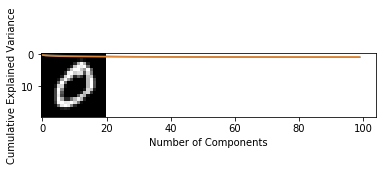

In [26]:
#digits
pca_1.fit(train_features_1)
plt.plot(np.cumsum(pca_1.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.imshow(images1[0,0], cmap='gray')
plt.show

#fashion
pca_2.fit(train_features_2)
plt.plot(np.cumsum(pca_2.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show

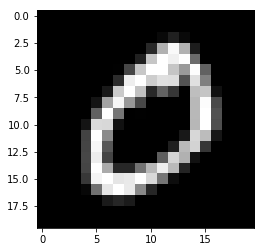

In [27]:
#Plotting image digit
plt.imshow(images1[0,0], cmap='gray')

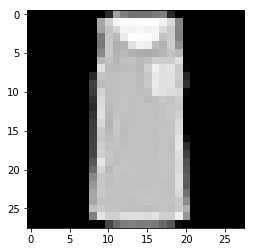

In [28]:
#Plotting image fashion
plt.imshow(images2[0,0], cmap='gray')

In [32]:
#Transform

train_features_1 = pca_1.transform(train_features_1)
test_features_1 = pca_1.transform(test_features_1)


train_features_2 = pca_2.transform(train_features_2)
test_features_2 = pca_2.transform(test_features_2)

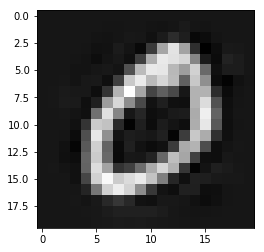

In [33]:
inverse_pca_1 = pca_1.inverse_transform(train_features_1)
inverse_pca_1.shape
plt.imshow(inverse_pca_1[0].reshape(20,20), cmap = 'gray')

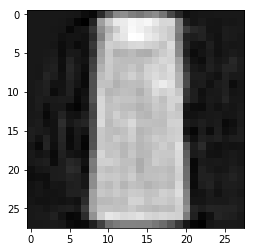

In [35]:
inverse_pca_2 = pca_2.inverse_transform(train_features_2)
inverse_pca_2.shape
plt.imshow(inverse_pca_2[0].reshape(28,28), cmap = 'gray')